In [ ]:
from scipy.io.wavfile import read
import numpy as np
from numpy import*
import matplotlib.pyplot as plt
a=read("./C_major.wav")
print(a)

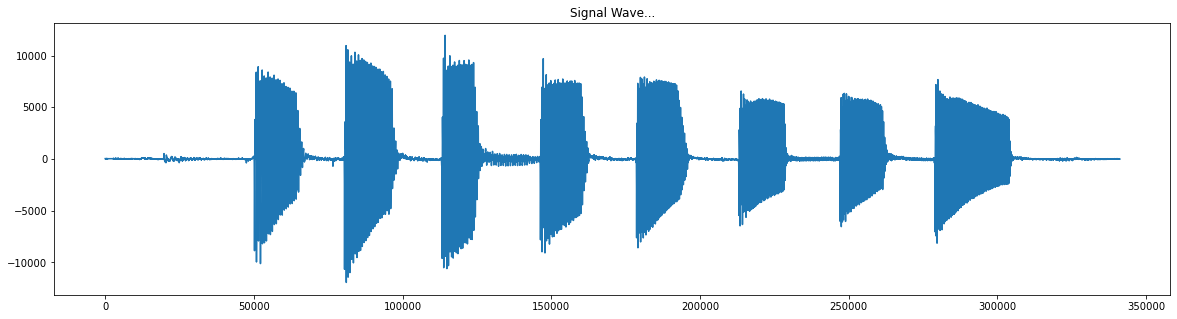

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys


spf = wave.open("C_major.wav", "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.frombuffer(signal, "int16")


# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)

plt.figure(figsize=(20, 5))
plt.title("Signal Wave...")
plt.plot(signal)
plt.show()

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read WAV file
def read_wav_file(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        num_channels = wav_file.getnchannels()
        sample_width = wav_file.getsampwidth()
        sample_rate = wav_file.getframerate()
        num_frames = wav_file.getnframes()
        print(num_frames)

        # Read audio data from WAV file
        audio_data = np.frombuffer(wav_file.readframes(num_frames), dtype=np.int16)

    return audio_data, sample_rate


# Calculate power envelope
def calculate_power_envelope(audio_data, window_size):
    power = np.square(audio_data)  # Square the audio data to get power
    power_envelope = np.convolve(power, np.ones(window_size)/window_size, mode='same')  # Calculate moving average for smoothing
    return power_envelope

# Plot power envelope
def plot_power_envelope(audio_data, sample_rate, power_envelope):
    times = np.arange(len(audio_data)) / sample_rate  # Time array

    plt.figure(figsize=(10, 6))
    plt.plot(times, power_envelope)
    plt.xlabel('Time (s)')
    plt.ylabel('Power Envelope')
    plt.title('Power Envelope of Audio')
    plt.grid(True)
    plt.show()

# Main function
def plot_the_thing():
    # Read WAV file
    file_path = 'C_major.wav'
    audio_data, sample_rate = read_wav_file(file_path)
    print(sample_rate)

    # Set parameters for power envelope calculation
    window_size = int(sample_rate * 0.2)  # Window size for moving average (10 ms)

    # Calculate power envelope
    power_envelope = calculate_power_envelope(audio_data, window_size)

    # Plot power envelope
    plot_power_envelope(audio_data, sample_rate, power_envelope)
    
plot_the_thing()


In [ ]:
# Function to detect note onsets
def detect_onsets(audio_data, T):
    n = 0
    t_n = 0
    t = 1
    print("sup")
    while t < len(audio_data):
        # Calculate NAE values
        NAE_minus_T = calculate_power(audio_data, t_n, t - T)
        NAE = calculate_power(audio_data, t_n, t)
        NAE_plus_T = calculate_power(audio_data, t_n, t + T)
        
        # Check for local minima condition
        if NAE_minus_T > NAE and NAE < NAE_plus_T:
            n += 1  # Increment note count
            t_n = t  # Update onset time
            
        t += 1
        
    return n

In [ ]:
# Main function
def main():
    # Read WAV file
    file_path = 'C_major.wav'
    audio_data, sample_rate = read_wav_file(file_path)

    # Set parameters for NAE calculation
    T = int(sample_rate * 0.01)  # Window size (10 ms)

    # Detect note onsets
    power_envelope = calculate_power_envelope(audio_data, window_size)
    num_onsets= detect_onsets(power_envelope, T)
    print(f'Total number of note onsets detected: {num_onsets}')


12


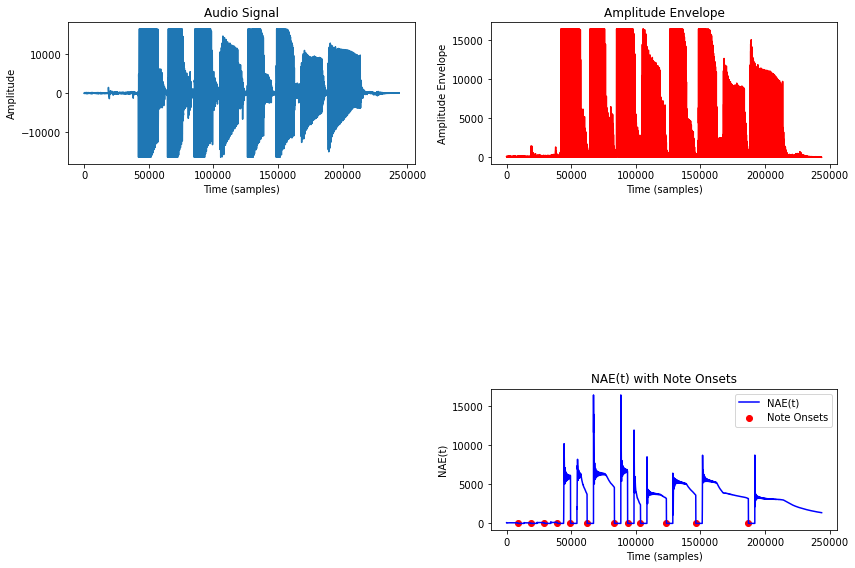

In [22]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Read WAV file
def read_wav_file(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        num_channels = wav_file.getnchannels()
        sample_width = wav_file.getsampwidth()
        sample_rate = wav_file.getframerate()
        num_frames = wav_file.getnframes()

        # Read audio data from WAV file
        audio_data = np.frombuffer(wav_file.readframes(num_frames), dtype=np.int16)

    return audio_data, sample_rate


# Function to calculate amplitude envelope using low-pass filtering
def calculate_amplitude_envelope(audio_data, sample_rate, cutoff_freq):
    # Rectification (take absolute value)
    rectified_signal = np.abs(audio_data)

#     # Design low-pass filter
#     nyquist_freq = 0.5 * sample_rate
#     normalized_cutoff = cutoff_freq / nyquist_freq
#     b, a = butter(4, normalized_cutoff, btype='low')

#     # Apply low-pass filter
#     amplitude_envelope = filtfilt(b, a, rectified_signal)

    return rectified_signal

# Function to calculate power envelope
def calculate_power_envelope(audio_data, window_size):
    power = np.square(audio_data)
    smoothing_window = np.ones(window_size) / window_size
    power_envelope = np.convolve(power, smoothing_window, mode='same')
    return power_envelope

# Function to calculate energy
def calculate_energy(power_envelope):
    energy = np.cumsum(power_envelope)
    return energy

# Function to calculate average energy
def calculate_average_energy(power_envelope):
    cumulative_sum = np.cumsum(power_envelope)
    time_indices = np.arange(1, len(power_envelope) + 1)
    average_energy = cumulative_sum / time_indices
    return average_energy


def calculate_NAE(amplitude_envelope, tn, t, T):
    """Calculate Note Average Energy (NAE) for the given time range."""
    if t == tn:
        return amplitude_envelope[t]

    integral_value = np.sum(amplitude_envelope[tn:t])
    return integral_value / (t - tn)

def detect_note_onsets(amplitude_envelope, T):
    """Detect note onsets based on the power envelope."""
    onsets = []
    all_NAE_values = []
    n = 0
    tn = 0  # Initial onset time
    
    for t in range(1, len(amplitude_envelope)):
        NAE_left = calculate_NAE(amplitude_envelope, tn, t - T, T)
        NAE_middle = calculate_NAE(amplitude_envelope, tn, t, T)
        NAE_right = calculate_NAE(amplitude_envelope, tn, t + T, T)
        
        if NAE_left > NAE_middle < NAE_right:
            onsets.append(t)
            n += 1
            tn = t + T  # Update onset time

        # Save NAE value for current time t
        all_NAE_values.append(NAE_middle)

    print(len(onsets))
    return onsets, all_NAE_values




# Read WAV file
file_path = 'samples/A_minor_1.wav'  # Replace 'audio.wav' with your WAV file
audio_data, sample_rate = read_wav_file(file_path)


# Parameters for power envelope calculation
window_size = int(sample_rate * 0.1)  # 10 ms window size

# Parameters for amplitude envelope calculation
cutoff_freq = 2000  # Cutoff frequency for low-pass filter (Hz)

# Calculate amplitude envelope
amplitude_envelope = calculate_amplitude_envelope(audio_data, sample_rate, cutoff_freq)

# # Calculate power envelope
# power_envelope = calculate_power_envelope(audio_data, window_size)

# # Calculate energy
# energy = calculate_energy(power_envelope)

# # Calculate average energy
# average_energy = calculate_average_energy(power_envelope)

# # Calculate cumulative energy
# cumulative_energy = calculate_cumulative_average_energy(power_envelope)

# Detect note onsets
T = 5000  # Example value of T
onsets, all_NAE_values = detect_note_onsets(amplitude_envelope, T)


# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(audio_data)
plt.title('Audio Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 2)
plt.plot(amplitude_envelope, color='r')
plt.title('Amplitude Envelope')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude Envelope')

# plt.subplot(3, 2, 3)
# plt.plot(power_envelope, color='g')
# plt.title('Power Envelope')
# plt.xlabel('Time (samples)')
# plt.ylabel('Power Envelope')

# plt.subplot(3, 2, 4)
# plt.plot(energy, color='m')
# plt.title('Energy')
# plt.xlabel('Time (samples)')
# plt.ylabel('Energy')

# plt.subplot(3, 2, 5)
# plt.plot(average_energy, color='y')
# plt.title('Average Energy')
# plt.xlabel('Time (samples)')
# plt.ylabel('Average Energy')

plt.subplot(3, 2, 6)
plt.plot(range(len(all_NAE_values)), all_NAE_values, color='b', label='NAE(t)')
plt.scatter(onsets, [all_NAE_values[idx] for idx in onsets], color='r', label='Note Onsets')
plt.title('NAE(t) with Note Onsets')
plt.xlabel('Time (samples)')
plt.ylabel('NAE(t)')
plt.legend()


plt.tight_layout()
plt.show()


In [4]:
print(all_NAE_values[110000:111000])

[1356.9261636650406, 1356.8797315140846, 1356.833376123235, 1356.7869507811927, 1356.7404921700224, 1356.694000293384, 1356.6475484982948, 1356.6010634396773, 1356.55458179018, 1356.5079935464946, 1356.4615187181462, 1356.4149373029259, 1356.3683959670027, 1356.3217480568999, 1356.2752135498772, 1356.2283891780921, 1356.1820081381281, 1356.1351173020528, 1356.0885231479785, 1356.0418224470347, 1355.9951251695195, 1355.9484313150565, 1355.901630932747, 1355.8549805761197, 1355.8081137538022, 1355.7614335971855, 1355.7145369929276, 1355.6677903994137, 1355.6209006632223, 1355.5741609262789, 1355.5272780566445, 1355.4804352604967, 1355.4336325334311, 1355.3866866940211, 1355.3399274645565, 1355.2929518646054, 1355.2460163375947, 1355.199120879121, 1355.152192227391, 1355.1052303860522, 1355.0582719847637, 1355.0112071491358, 1354.9642556308368, 1354.9171976854905, 1354.8701798073755, 1354.8231287534788, 1354.7760445274453, 1354.7288905162943, 1354.6818131888251, 1354.6347026947863, 1354.5

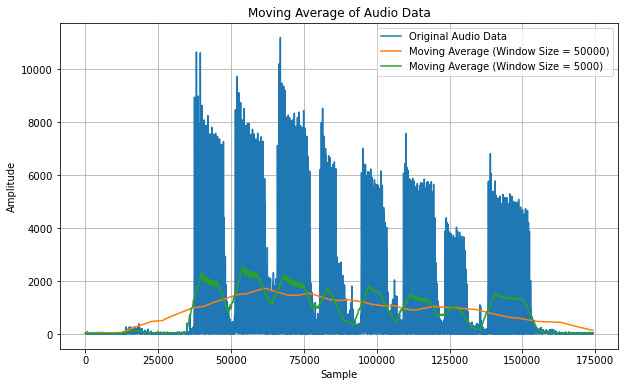

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

def moving_average(data, window_size):
    """Calculate moving average of data."""
    # Pad the data at the beginning and end to handle edge cases
    padded_data = np.pad(data, (window_size // 2, window_size // 2), mode='edge')
    
    # Calculate moving average using convolution
    weights = np.ones(window_size) / window_size
    moving_avg = np.convolve(padded_data, weights, mode='valid')
    
    return moving_avg

# Load audio data from WAV file
sample_rate, audio_data = wavfile.read('samples/C_major2.wav')

# Convert audio data to floating point for processing
audio_data = audio_data.astype(np.float32)

# Rectification (take absolute value)
rectified_signal = np.abs(audio_data)

# Calculate moving average
window_size_broad = 50000
moving_avg_broad = moving_average(rectified_signal, window_size_broad)

window_size_fine = 5000
moving_avg_fine = moving_average(rectified_signal, window_size_fine)

# Plot original audio data and moving average
plt.figure(figsize=(10, 6))
plt.plot(rectified_signal, label='Original Audio Data')
plt.plot(moving_avg_broad, label='Moving Average (Window Size = {})'.format(window_size_broad))
plt.plot(moving_avg_fine, label='Moving Average (Window Size = {})'.format(window_size_fine))
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Moving Average of Audio Data')
plt.legend()
plt.grid(True)
plt.show()

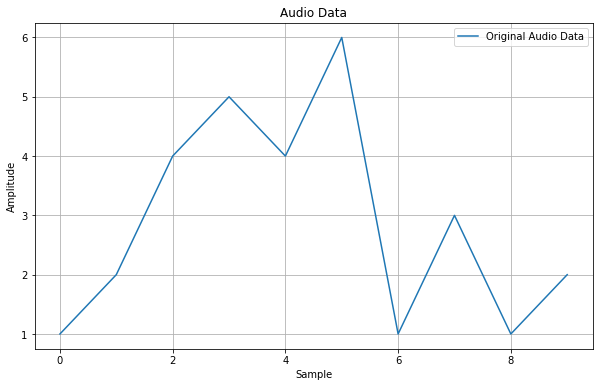

In [7]:
# Plot original audio data and moving average
plt.figure(figsize=(10, 6))
plt.plot(rectified_signal[4590:4600], label='Original Audio Data')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Audio Data')
plt.legend()
plt.grid(True)
plt.show()

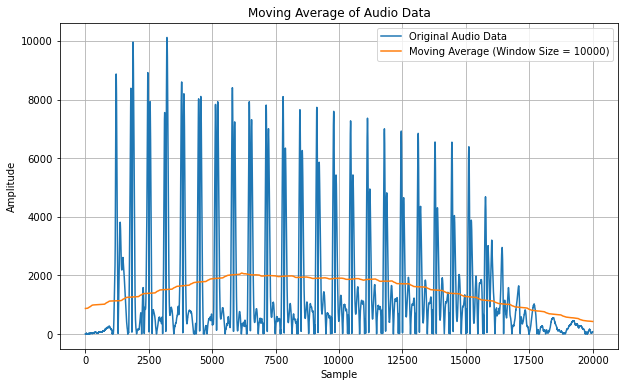

In [21]:
# Calculate moving average
window_size = 10000
moving_avg = moving_average(rectified_signal[49000:69000], window_size)


# Plot original audio data and moving average
plt.figure(figsize=(10, 6))
plt.plot(rectified_signal[49000:69000], label='Original Audio Data')
plt.plot(moving_avg, label='Moving Average (Window Size = {})'.format(window_size))
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Moving Average of Audio Data')
plt.legend()
plt.grid(True)
plt.show()